In [4]:
# import packages and read in full dataset (pca features)
from read_data import get_all_data, split_and_stratify_data, get_balanced_df

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

full_dataset = get_all_data(number_of_pca_features = 100)
full_dataset.head()

GroundTruth.csv read. Processing/searching for image data. May take a few minutes if process_images_again == True.

Existing image data read..


,image,cancer_type,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,ISIC_0024306.jpg,NV,2.227468,-3.264277,-1.167765,0.924474,-2.286435,1.804567,0.273134,0.418798,...,-0.099027,-0.009333,-0.051041,-0.019836,-0.134981,0.083766,0.020061,-0.062348,-0.155223,-0.037895
1,ISIC_0024307.jpg,NV,1.068419,-1.742836,-2.110399,0.040784,-1.148290,0.792414,0.011848,0.533355,...,-0.039695,-0.032529,0.015959,-0.021628,-0.059418,-0.019899,0.006778,0.107662,-0.039652,-0.009560
2,ISIC_0024308.jpg,NV,0.983078,-4.920764,0.617789,1.684504,-0.617451,-0.853629,-0.934357,0.139916,...,0.103498,0.018952,0.015636,0.057682,0.015973,0.040700,0.187303,-0.050769,0.090087,0.106535
3,ISIC_0024309.jpg,NV,4.042187,-1.004445,-1.730627,0.354093,0.451159,-2.407673,0.339228,-0.318631,...,-0.080027,-0.027284,0.011457,0.087806,-0.070773,-0.000180,-0.049357,0.022274,0.046849,-0.057677
4,ISIC_0024310.jpg,MEL,0.925909,-0.801578,-0.337978,1.529686,-0.320369,0.183890,-0.863793,0.924670,...,0.221153,0.113545,0.000518,0.071552,0.341293,-0.269370,0.305026,-0.021116,0.292971,0.065647


In [17]:
# split into train test and validation datasets
train, test, validate = split_and_stratify_data(full_dataset)

# balance the training set?
#train = get_balanced_df(train, val_size = 1000, col = 'cancer_type')

# create X and y train, test and validate sets
X_train = train.iloc[:,2:-1]
X_test = test.iloc[:,2:-1]
X_validate = validate.iloc[:,2:-1]

y_train = train.iloc[:,1]
y_test = test.iloc[:,1]
y_validate = validate.iloc[:,1]

print('Training Set Cancer Counts')
print(y_train.value_counts())
print('Test Set Cancer Counts')
print(y_test.value_counts())
print('Validation Set Cancer Counts')
print(y_validate.value_counts())

Training Set Cancer Counts
NV       5364
MEL       890
BKL       879
BCC       411
AKIEC     262
VASC      114
DF         92
Name: cancer_type, dtype: int64
Test Set Cancer Counts
NV       670
MEL      111
BKL      110
BCC       51
AKIEC     33
VASC      14
DF        12
Name: cancer_type, dtype: int64
Validation Set Cancer Counts
NV       671
MEL      112
BKL      110
BCC       52
AKIEC     32
VASC      14
DF        11
Name: cancer_type, dtype: int64


## Random Forest Classifier

Model Accuracy is 67.47%


 Here is the classification report. 

              precision    recall  f1-score   support

       AKIEC       0.00      0.00      0.00        32
         BCC       0.00      0.00      0.00        52
         BKL       1.00      0.04      0.07       110
          DF       0.00      0.00      0.00        11
         MEL       1.00      0.01      0.02       112
          NV       0.67      1.00      0.80       671
        VASC       0.00      0.00      0.00        14

    accuracy                           0.67      1002
   macro avg       0.38      0.15      0.13      1002
weighted avg       0.67      0.67      0.55      1002

Confusion Matrix is here:



/Users/johnwalker/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johnwalker/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johnwalker/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

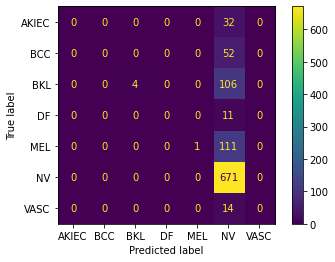

In [18]:
forest_clf = RandomForestClassifier(n_estimators=75, random_state=42, class_weight = 'balanced')
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_validate)

print(f'Model Accuracy is {round(accuracy_score(y_validate, y_pred),4)*100}%\n')

print('\n Here is the classification report. \n')
print(classification_report(y_validate, y_pred))

print('Confusion Matrix is here:\n')
plot_confusion_matrix(forest_clf, X_validate, y_validate)  
plt.show()  


Big problem with misclassification of many data points as the most popular 'NV' cancer type.. Tried playing around with balancing the train set through function and through 'class_weight' parameter in random forest classifier, but couldn't improve performance consistently.